# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [145]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', skiprows=1, header = None, names = columns))


In [146]:
print(fires_dt.dtypes)
fires_dt.head()

coord_x      int64
coord_y      int64
month       object
day         object
ffmc       float64
dmc        float64
dc         float64
isi        float64
temp       float64
rh           int64
wind       float64
rain       float64
area       float64
dtype: object


,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Get X and Y

Create the features data frame and target data.

In [147]:
#feature dataframe 
X = fires_dt.drop('area', axis = 1)

#target dataframe
Y = fires_dt['area']

fires_dt.shape, X.shape, Y.shape

((517, 13), (517, 12), (517,))

In [148]:
# Splitting the data for training and testing 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [149]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  

from sklearn.metrics import accuracy_score, log_loss, cohen_kappa_score, f1_score


In [150]:
#Getting to know datatypes 
print(X.dtypes)

#Numerical Variables  
X_numerical = X.select_dtypes(exclude=['object', 'category', 'bool', 'datetime', 'timedelta' ] ).columns

#Categorical Variables  
X_categorical = X.select_dtypes(include=['object', 'category']).columns

# Validations  
"Numerical Variables:", X_numerical, "Categorical Variables:", X_categorical



coord_x      int64
coord_y      int64
month       object
day         object
ffmc       float64
dmc        float64
dc         float64
isi        float64
temp       float64
rh           int64
wind       float64
rain       float64
dtype: object


('Numerical Variables:',
 Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
        'rain'],
       dtype='object'),
 'Categorical Variables:',
 Index(['month', 'day'], dtype='object'))

In [151]:
# preproc1


preproc1 = ColumnTransformer(
    transformers=[
        ('numeric_transfomer', StandardScaler(), X_numerical ),
        ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist'), X_categorical), 
    ]
)

preproc1


ColumnTransformer(transformers=[('numeric_transfomer', StandardScaler(),
                                 Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 Index(['month', 'day'], dtype='object'))])

In [152]:
# Define categorical and numeric columns
cat_cols = ['month', 'day']
num_cols = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
# numerical Variables
pipe_num_cols = Pipeline([
('standardizer', RobustScaler())
])
# categorical Variables
pipe_cat_cols = Pipeline([
('standardizer', OneHotEncoder(handle_unknown='infrequent_if_exist') )
])
preproc1 = ColumnTransformer([
('num', pipe_num_cols, num_cols),
('cat', pipe_cat_cols, cat_cols)]
, remainder='drop'
)
preproc1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardizer',
                                                  RobustScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 Pipeline(steps=[('standardizer',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 ['month', 'day'])])

In [153]:
#validating the transform pipeline - to confirm no error 
preproc1.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardizer',
                                                  RobustScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 Pipeline(steps=[('standardizer',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc2 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [154]:
# preproc2

# Pipeline for numerical variables 
pipe2a = Pipeline(steps = [
    ('non_linear_trans', PowerTransformer(method='yeo-johnson')),
    ('scalar', RobustScaler())
])
pipe2a


Pipeline(steps=[('non_linear_trans', PowerTransformer()),
                ('scalar', RobustScaler())])

In [155]:
preproc2 = ColumnTransformer(
    transformers=[
        ('num_trans', pipe2a, ['rain']), 
        ('cat_trans', OneHotEncoder(handle_unknown='infrequent_if_exist'), X_categorical)
        ]
)
preproc2


ColumnTransformer(transformers=[('num_trans',
                                 Pipeline(steps=[('non_linear_trans',
                                                  PowerTransformer()),
                                                 ('scalar', RobustScaler())]),
                                 ['rain']),
                                ('cat_trans',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 Index(['month', 'day'], dtype='object'))])

In [156]:
#validating the transform pipeline - to confirm no error 
preproc2.fit(X)

ColumnTransformer(transformers=[('num_trans',
                                 Pipeline(steps=[('non_linear_trans',
                                                  PowerTransformer()),
                                                 ('scalar', RobustScaler())]),
                                 ['rain']),
                                ('cat_trans',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 Index(['month', 'day'], dtype='object'))])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

#Defining Regressors 
reg1 = LinearRegression() 
reg2 = RandomForestRegressor(random_state=42)



In [158]:
# Defining function for the mentioned model pipeline stages
def my_pipeline(pre, reg):
    pipe1 = Pipeline([
        ('preprocessing', pre),
        ('regressor', reg)
    ])
    return pipe1



In [159]:
# Pipeline A = preproc1 + baseline
pipeline_a = my_pipeline(preproc1, reg1 )

pipeline_a

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardizer',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('standardizer',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [160]:
# Pipeline B = preproc2 + baseline
pipeline_b = my_pipeline(preproc2, reg1 )

pipeline_b

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('non_linear_trans',
                                                                   PowerTransformer()),
                                                                  ('scalar',
                                                                   RobustScaler())]),
                                                  ['rain']),
                                                 ('cat_trans',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  Index(['month', 'day'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [185]:
# Pipeline C = preproc1 + advanced model
pipeline_c = my_pipeline(preproc1, reg2 )

pipeline_c

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardizer',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('standardizer',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [186]:
# Pipeline D = preproc2 + advanced model
pipeline_d = my_pipeline(preproc2, reg2 )

pipeline_d

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('non_linear_trans',
                                                                   PowerTransformer()),
                                                                  ('scalar',
                                                                   RobustScaler())]),
                                                  ['rain']),
                                                 ('cat_trans',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  Index(['month', 'day'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [187]:
#Testing pipelines 
pipeline_a.fit(X_train, Y_train)
pipeline_b.fit(X_train, Y_train)
pipeline_c.fit(X_train, Y_train)
pipeline_d.fit(X_train, Y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('non_linear_trans',
                                                                   PowerTransformer()),
                                                                  ('scalar',
                                                                   RobustScaler())]),
                                                  ['rain']),
                                                 ('cat_trans',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  Index(['month', 'day'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [188]:
from sklearn.model_selection import GridSearchCV

#Reviewing Hyper parameters 
pipeline_a.get_params()
pipeline_b.get_params()
pipeline_c.get_params()
pipeline_d.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num_trans',
                                    Pipeline(steps=[('non_linear_trans',
                                                     PowerTransformer()),
                                                    ('scalar', RobustScaler())]),
                                    ['rain']),
                                   ('cat_trans',
                                    OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                    Index(['month', 'day'], dtype='object'))])),
  ('regressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('num_trans',
                                  Pipeline(steps=[('non_linear_trans',
                                                   PowerTransformer()),
                                                  ('scalar', RobustScaler())]),
                                  ['rain']),
 

In [189]:
# Parameter grid for base regression 
param_grid_a = {
    'regressor__copy_X': [True, False],
    'regressor__fit_intercept': [True, False]
}
scoring_a='neg_root_mean_squared_error'
refit_a = "neg_root_mean_squared_error"

param_grid_b = param_grid_a 
scoring_b = scoring_a
refit_b = refit_a 

# Parameter grid for classifier 
param_grid_c = {
    'regressor__n_estimators': [5, 100, 200, 300],  
    'regressor__max_depth': [None, 5, 10, 20],  
    'regressor__min_samples_split': [2, 5, 10] 
    }

scoring_c='neg_root_mean_squared_error'
refit_c = "neg_root_mean_squared_error"

param_grid_d = param_grid_c
scoring_d = scoring_c
refit_d = refit_c


In [168]:
from sklearn.model_selection import GridSearchCV

grid_cv_a = GridSearchCV( 
    estimator  = pipeline_a, 
    param_grid = param_grid_a, 
    scoring    = scoring_a, 
    cv         = 5,
    refit = refit_a) 

grid_cv_a


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__copy_X': [True, False],
                         'regressor__fit_intercept': [True, False]},
             refit='neg_root_mean_squared_error',
             scoring='neg_root_mean_squared_error')

In [169]:
grid_cv_a.fit(X_train , Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__copy_X': [True, False],
                         'regressor__fit_intercept': [True, False]},
             refit='neg_root_mean_squared_error',
             scoring='neg_root_mean_squared_error')

In [172]:

grid_cv_b = GridSearchCV( 
    estimator  = pipeline_b, 
    param_grid = param_grid_b, 
    scoring    = scoring_b, 
    cv         = 5,
    refit = refit_b,
    return_train_score=True) 

grid_cv_b.fit(X_train , Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_trans',
                                                                         Pipeline(steps=[('non_linear_trans',
                                                                                          PowerTransformer()),
                                                                                         ('scalar',
                                                                                          RobustScaler())]),
                                                                         ['rain']),
                                                                        ('cat_trans',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         Index(['month', 'day'], dtype='object'))])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__copy_X': [True, False],
                         'regressor__fit_intercept': [True, False]},
             refit='neg_root_mean_squared_error', return_train_score=True,
             scoring='neg_root_mean_squared_error')

In [201]:
grid_cv_c = GridSearchCV( 
    estimator  = pipeline_c, 
    param_grid = param_grid_c, 
    cv         = 5,
    return_train_score=True) 


In [198]:
grid_cv_c.fit(X_train , Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__max_depth': [None, 5, 10, 20],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [5, 100, 200, 300]},
             return_train_score=True)

In [202]:

grid_cv_d = GridSearchCV( 
    estimator  = pipeline_d, 
    param_grid = param_grid_d, 
    cv         = 5,
    return_train_score=True) 

grid_cv_d.fit(X_train , Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_trans',
                                                                         Pipeline(steps=[('non_linear_trans',
                                                                                          PowerTransformer()),
                                                                                         ('scalar',
                                                                                          RobustScaler())]),
                                                                         ['rain']),
                                                                        ('cat_trans',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         Index(['month', 'day'], dtype='object'))])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__max_depth': [None, 5, 10, 20],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [5, 100, 200, 300]},
             return_train_score=True)

# Evaluate

+ Which model has the best performance?

In [199]:
# Defining function for model peformance assessment and identifying best performing hyperparameter values 

def perf(model):
    res = pd.DataFrame(model.cv_results_)
    res.sort_values('rank_test_score')

    # Hyperparameters that lead to the best performance 
    best_perf = model.best_params_
    best_score = model.best_score_

    ret = "Best Performance achieved with model was " +  str(best_score) + " using parameters " + str(best_perf)
    return ret


In [177]:
# Best performing parametes for Model-A 

perf(grid_cv_a) 


"Best Performance achieved with model was -41.17735615181537 using parameters {'regressor__copy_X': True, 'regressor__fit_intercept': True}"

In [178]:
# Best performing parametes for Model-B 

perf(grid_cv_b)

"Best Performance achieved with model was -40.04903401798312 using parameters {'regressor__copy_X': True, 'regressor__fit_intercept': False}"

In [200]:
# Best performing parametes for Model-C 

perf(grid_cv_c)

"Best Performance achieved with model was -0.9072431100252274 using parameters {'regressor__max_depth': 5, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 5}"

In [203]:
# Best performing parametes for Model-D

perf(grid_cv_d)

"Best Performance achieved with model was -0.2717076364282528 using parameters {'regressor__max_depth': 5, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 300}"

In [258]:
grid_cv_d.best_estimator_.fit(X_train, Y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('non_linear_trans',
                                                                   PowerTransformer()),
                                                                  ('scalar',
                                                                   RobustScaler())]),
                                                  ['rain']),
                                                 ('cat_trans',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  Index(['month', 'day'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=5, min_samples_split=10,
                                       n_estimators=300, random_state=42))])

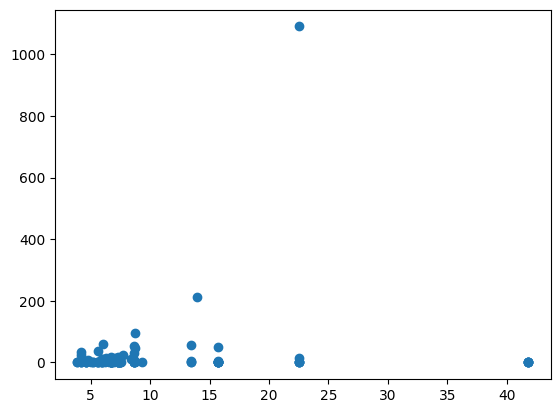

In [259]:
import matplotlib.pyplot as plt
predicted_values = grid_cv_d.best_estimator_.predict(X_test)
actual_values = Y_test
plotData = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
plt.plot(predicted_values, actual_values, 'o')

#### Overall Results  - Selection of the best Model 

According to the results obtained above, model-D performs the best among others, with the following hyperparameters of random forest regressor 
'regressor__max_depth': 5
'regressor__min_samples_split': 10 
'regressor__n_estimators': 300

Best Performance achieved with model-D was -0.27



# Export

+ Save the best performing model to a pickle file.

In [205]:
import pickle

export_path = '../../05_src/models/model_d.pkl'

with open(export_path, 'wb') as file:
    pickle.dump(grid_cv_d.best_estimator_, file)



# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [280]:
import shap
# pipeline_b.fit(X_train,Y_train)
data_transform = pipeline_b.named_steps['preprocessing'].transform(X_test)
explainer = shap.explainers.Linear(
    pipeline_b.named_steps['regressor'],
    data_transform,
    feature_names = pipeline_b.named_steps['preprocessing'].get_feature_names_out()
    )
shap_values = explainer(data_transform)

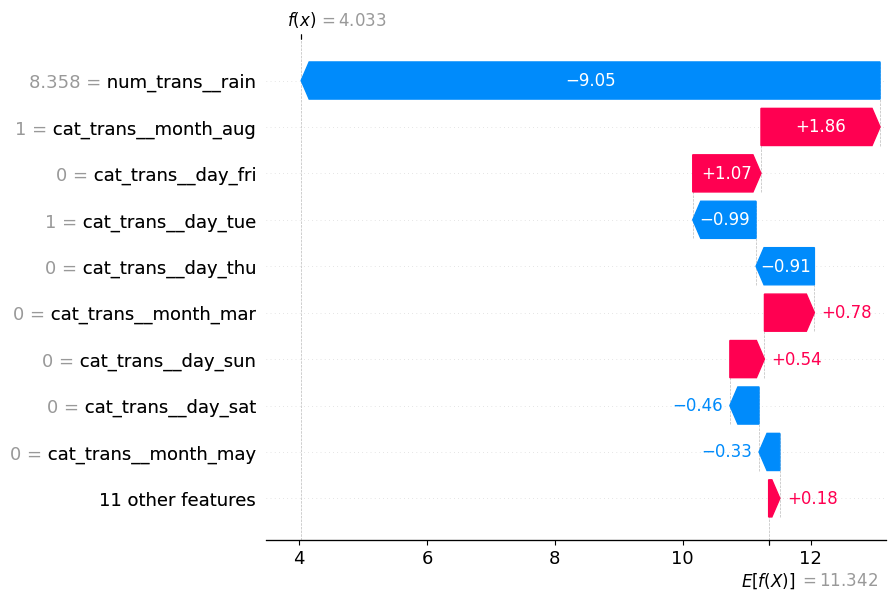

In [281]:
shap.plots.waterfall(shap_values[1])

*(Answer here.)*

The waterfall chart shows that the numerical variable that we picked for numerical transformation i.e. rain plays negative impact on the fire area. Saying that, higher the rainfall, lower is the area of fire predicated. 
Hence, in the model, the rain is the most important feature. 

Other important feature is the month of the year that shows that Aug and March are the most impacting months, both having positive contribution in the area of the fire. 

Based on the results generated, the least important variable would be the day of the week, that doesnt contibute much to the model accuracy. Hence that can be removed. 


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.